# 1. Import librairies

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from IPython.display import display

# 2. Import des données

In [81]:
df = pd.read_csv('data.csv')
df.set_index('Zone', inplace=True)
df.head()

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
Zone,,,,,,,,
Afghanistan,50.88,0.00,54.09,8.39,1997.0,16.48,530.149831,-2.80
Afrique du Sud,24.27,2.97,83.36,33.84,2987.0,7.91,6723.928582,-0.28
Albanie,80.85,0.00,119.50,21.77,3400.0,-1.03,4521.752219,0.38
Algérie,0.72,0.00,92.85,10.48,3345.0,10.71,4134.936054,-0.92
Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59


In [82]:
df.shape

(167, 8)

# 3. CAH ( classification ascendante hiérarchique)

## Création du dendrogramme

In [83]:
# transformer le dataframe en array Numpy
X = df.values

# centrer et réduire les  données 

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


In [84]:
# On créer un dataframe à partir des données centrées-réduites
df_X_scaled = pd.DataFrame(X_scaled, columns= df.columns, index= df.index)
df_X_scaled.head(3)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
Zone,,,,,,,,
Afghanistan,0.172923,-0.285095,-1.335261,-1.671031,-1.871493,1.423343,-0.685954,-3.050312
Afrique du Sud,-0.393098,-0.222141,0.138886,0.722573,0.289974,0.124876,-0.351682,-0.220487
Albanie,0.810415,-0.285095,1.959032,-0.412626,1.191676,-1.229651,-0.470531,0.520657


In [85]:
# liaision de calcul : calcul des distances avec la méthode ward
Z = linkage(X_scaled, method="ward")

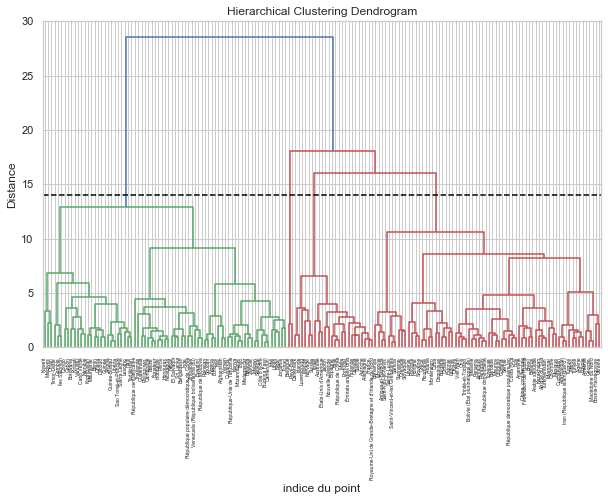

In [86]:
# afficher le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(10,6))

dendrogram(Z, ax=ax, labels=df.index)

plt.title("Hierarchical Clustering Dendrogram")
plt.axhline(y=14, color='black', linestyle='dashed') # Threshold
plt.xlabel("indice du point")
plt.ylabel("Distance")
plt.show()

Le dendrogramme  montre que on pourrait diviser notre arbre en deux clusters comme indiqué avec un cluster en vert et l'autre en rouge. Cependant, on pourrait couper l'arbre à une distance de 14 pour obtenir 4 clusters.


Cependant,pour déterminer la “meilleure” valeur du nombre de cluster, on peut utiliser la méthode de coude et de silhouette.

# 4. K-means

## 4.1 la méthode du coude

In [87]:
intertia = []

k_list = range(1, 11)


In [88]:
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled) 
    intertia.append(kmeans.inertia_)



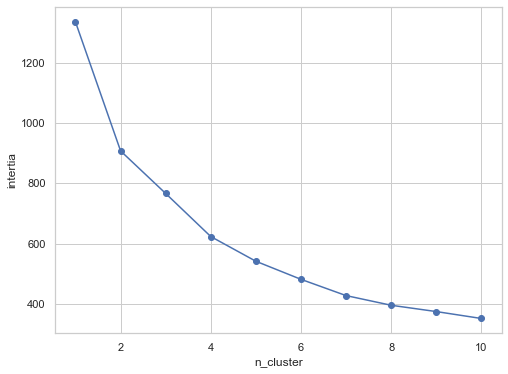

In [89]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia, marker='o' )

 On voit une zone de "coude" pour un nombre de clusters de 4 à 6 en observant la décroissance de l’inertie intra-classe. Cette méthode nous indique de choisir entre 4 à 6 cluster.

## 4.2 Méthode de silhouette

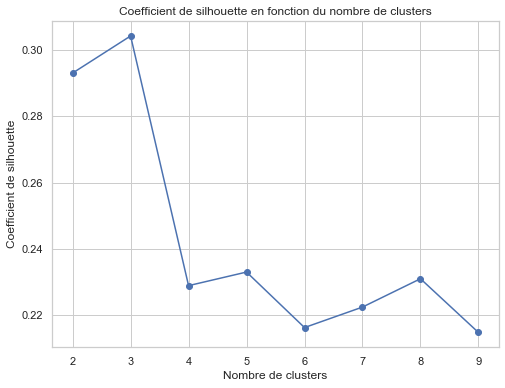

In [90]:
# On crée une liste vide
wcss =[]
tab_silhouette = []

# Pour chaque tour de boucle on lance l'algorithme du kmeans pour un nombre de clusters donnée et on calcul le silhouette score
# Puis on stocke la valeur dans la liste tab_sihlouette
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled) 
    kmeans.labels_
    wcss.append(kmeans.inertia_)
    tab_silhouette.append(silhouette_score(X_scaled,kmeans.labels_))
    
# On chercher la valeur maximum dans la liste tab_silhouette
val_max = max(tab_silhouette)

# On affiche le silhouette score pour chaque nombre de cluster
fig, ax = plt.subplots(1,1,figsize=(8,6))
plt.plot(range(2, 10), tab_silhouette, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
#plt.hlines(xmin=3, xmax=0, y=val_max, color='g', linestyle='-', linewidth=2)
#plt.vlines(x=3, ymin= 0, ymax=val_max, color='g', linestyle='-', linewidth=2)
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.show()

  le plus haut coefficient de silhouette qui détermine le nombre idéal de cluster indique ici 3 cluster.

### A partir des deux méthode uliliser on peut choisir le nombre de cluster qui est de 4.

## 4.3 Classification par K-Means des cluster avec nombre de cluster égal à 4.

In [91]:

# Créez un modèle K-Means avec 4 clusters
model = KMeans(n_clusters=4)
model.fit(X_scaled)

# Prédisez les clusters pour chaque point de données dans X_scaled
Kmeans_labels = model.predict(X_scaled)

# On crée un dataframe à partir des données centrées-réduites
df_k_means = pd.DataFrame(X_scaled, columns= df.columns, index= df.index)

# On ajoute la colonne "cluster" avec le numéro de cluster pour chaque individus
df_k_means["cluster"] = Kmeans_labels

df_k_means.head()



,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité,cluster
Zone,,,,,,,,,
Afghanistan,0.172923,-0.285095,-1.335261,-1.671031,-1.871493,1.423343,-0.685954,-3.050312,2
Afrique du Sud,-0.393098,-0.222141,0.138886,0.722573,0.289974,0.124876,-0.351682,-0.220487,0
Albanie,0.810415,-0.285095,1.959032,-0.412626,1.191676,-1.229651,-0.470531,0.520657,0
Algérie,-0.894031,-0.285095,0.616838,-1.474464,1.071595,0.549112,-0.491407,-0.939173,2
Allemagne,0.120596,0.502354,1.181920,0.674606,1.538821,-0.758445,1.696244,0.756476,1


# 5. Projection du nuage des individus sur F1 F2 avec les clusters CAH et Kmeans pour les comparer

## 5.1  Analyse CAH avec nombre de cluster égal à 4.

In [92]:
# On instancie avec un nombre de cluster égal à 4
#cah = AgglomerativeClustering(n_clusters=4, linkage="ward")
cah= fcluster(Z, 4, criterion='maxclust')
# On fit
#cah_labels = cah.fit_predict(X_scaled)


# On crée un dataframe à partir des données centrées-réduites

df_cah = pd.DataFrame(X_scaled, columns= df.columns, index= df.index)

# On ajoute la colonne "cluster" avec le numéro de cluster attribué à chaque individus
df_cah["cluster"] = cah
df_cah.head(3)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité,cluster
Zone,,,,,,,,,
Afghanistan,0.172923,-0.285095,-1.335261,-1.671031,-1.871493,1.423343,-0.685954,-3.050312,1
Afrique du Sud,-0.393098,-0.222141,0.138886,0.722573,0.289974,0.124876,-0.351682,-0.220487,4
Albanie,0.810415,-0.285095,1.959032,-0.412626,1.191676,-1.229651,-0.470531,0.520657,4


## 5.2 Affichage du dendrogramme avec 4 cluster

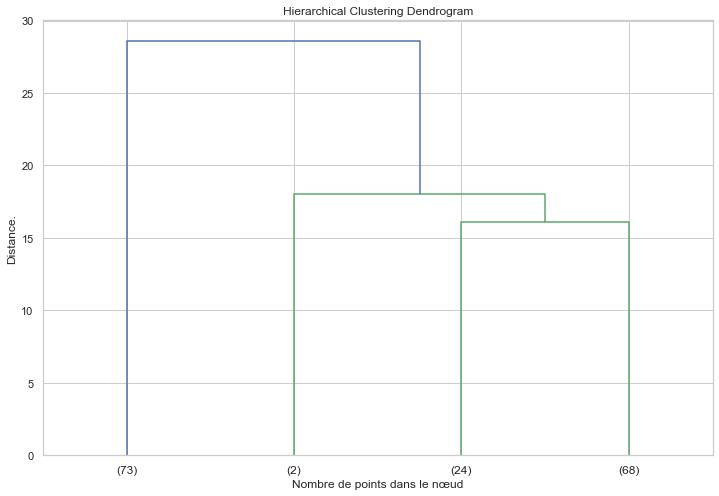

In [93]:
# afficher le dendrogramme en 4 cluster 
fig, ax = plt.subplots(1, 1, figsize=(12,8))

dendrogram(Z, labels = df.index,p=4, truncate_mode="lastp", ax=ax )

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Nombre de points dans le nœud")
plt.ylabel("Distance.")
plt.show()

## 5.3 Comparer les deux méthodes en les projectants sur les des deux axes F1 et F2

In [94]:
# Initialisation d'une liste pour stocker les centroïdes CAH
centroids_cah = []

# Calcul des centroïdes pour chaque cluster CAH
for cluster_label in np.unique(cah):
    cluster_points = X_scaled[cah == cluster_label]
    centroid = np.mean(cluster_points, axis=0)
    centroids_cah.append(centroid)

centroids_cah = np.array(centroids_cah)

In [95]:
centroids_cah

array([[ 0.05057109, -0.23695282, -0.84660803, -0.75559082, -0.80104799,
         0.73925082, -0.54798265, -0.56121712],
       [ 3.19393748,  8.32872219,  1.12249033,  0.42537067,  1.43293059,
        -0.74102129,  1.78481608,  0.85192631],
       [-0.15786763,  0.10158149,  1.3877394 ,  0.8595739 ,  1.23279484,
        -0.54203415,  2.0156659 ,  1.00305618],
       [-0.09251091, -0.02643889,  0.38605383,  0.49525904,  0.3826995 ,
        -0.58050658, -0.17563059,  0.22340661]])

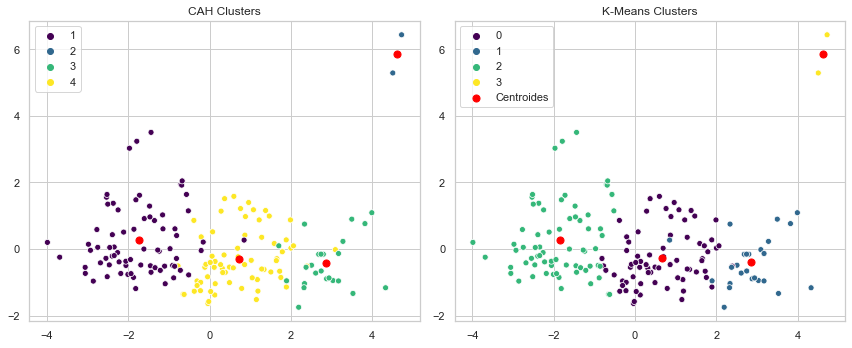

In [96]:
# Effectuez une Analyse en Composantes Principales (PCA) sur vos données
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled représente vos données mises à l'échelle


# Graphiques de dispersion des centroides projetés
plt.figure(figsize=(12, 5))

# CAH
# Projection des centroïdes CAH sur les composantes principales
centroids_proj_cah = pca.transform(centroids_cah)
centroids_proj_cah = pd.DataFrame(centroids_proj_cah, 
                                  columns=["F1", "F2"], 
                                  index=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cah, palette="viridis", legend="full")
plt.scatter(centroids_proj_cah["F1"], centroids_proj_cah["F2"], marker='o', s=50, c='red', label='Centroides')
plt.title("CAH Clusters")

# K-Means
# On récupère les controides du kmeans et on calcul leurs coordonnées sur F1 et F2
centroids = model.cluster_centers_
centroids_proj = pca.transform(centroids)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns=["F1", "F2"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Kmeans_labels, palette="viridis", legend="full")
plt.scatter(centroids_proj["F1"], centroids_proj["F2"], marker='o', s=50, c='red', label='Centroides')
plt.title("K-Means Clusters")

plt.tight_layout()
plt.legend()
plt.show()


le clustering semble assez similaire d'une méthode à l'autre et  ne se chevauchent pas sur les axes F1 et F2.
Les centroïdes sont bien distants.

In [97]:

# accéder aux 4 clusters spécifiques cah
cah_gr_1= df_cah.loc[df_cah['cluster'] == 1]
cah_gr_2= df_cah.loc[df_cah['cluster'] == 2]
cah_gr_3= df_cah.loc[df_cah['cluster'] == 3]
cah_gr_4= df_cah.loc[df_cah['cluster'] == 4]

 #accéder aux 4 clusters spécifiques kmeans
kmeans_gr_0 = df_k_means.loc[df_k_means['cluster'] == 0]
kmeans_gr_1 = df_k_means.loc[df_k_means['cluster'] == 1]
kmeans_gr_2 = df_k_means.loc[df_k_means['cluster'] == 2]
kmeans_gr_3 = df_k_means.loc[df_k_means['cluster'] == 3]




On observe 4 groupes , donc un groupe avec seulement deux individus. Ils presentent les caractéristiques. Leurs données sont trop proches.

# 6.  Analyse des variables de chaque cluster

In [98]:
df_cah.head()

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité,cluster
Zone,,,,,,,,,
Afghanistan,0.172923,-0.285095,-1.335261,-1.671031,-1.871493,1.423343,-0.685954,-3.050312,1
Afrique du Sud,-0.393098,-0.222141,0.138886,0.722573,0.289974,0.124876,-0.351682,-0.220487,4
Albanie,0.810415,-0.285095,1.959032,-0.412626,1.191676,-1.229651,-0.470531,0.520657,4
Algérie,-0.894031,-0.285095,0.616838,-1.474464,1.071595,0.549112,-0.491407,-0.939173,4
Allemagne,0.120596,0.502354,1.181920,0.674606,1.538821,-0.758445,1.696244,0.756476,3


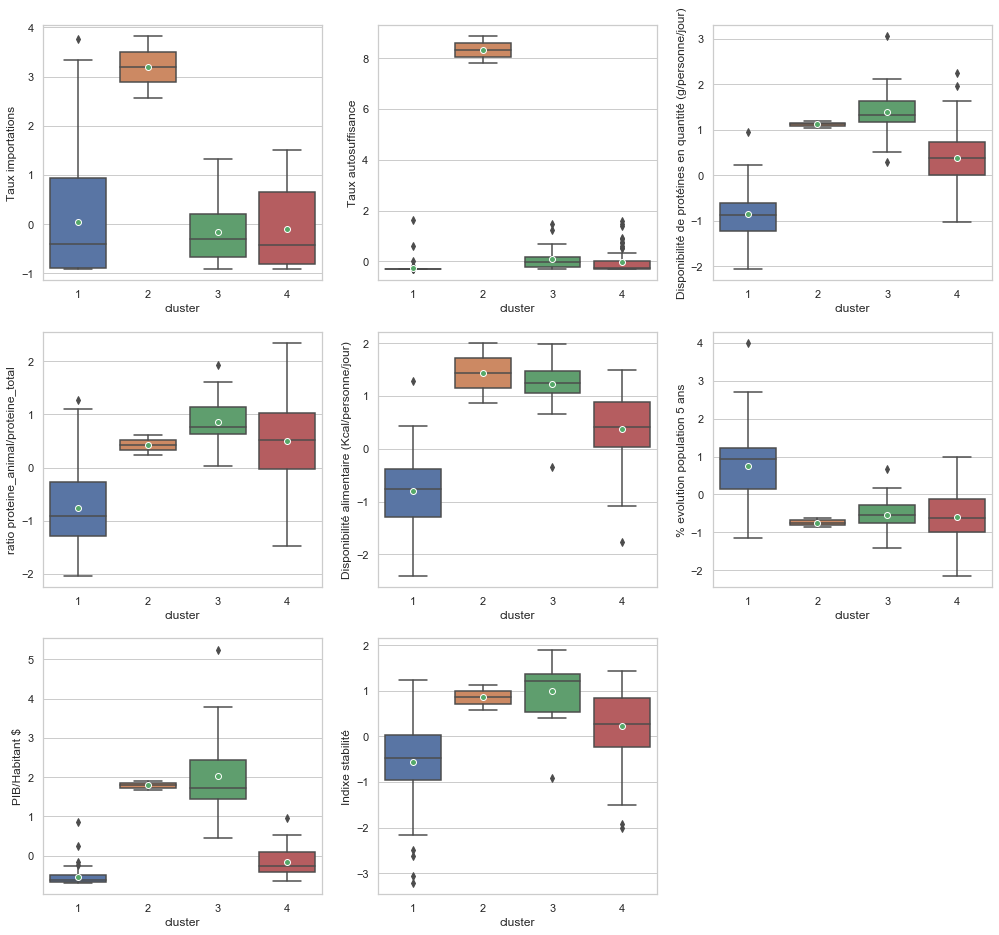

In [99]:
# Création de boxplot cah
plt.figure(figsize=(17, 16))

sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df_cah, x="cluster", y="Taux importations",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(332)
sns.boxplot(data=df_cah, x="cluster", y="Taux autosuffisance",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(333)
sns.boxplot(data=df_cah, x="cluster", y="Disponibilité de protéines en quantité (g/personne/jour)",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(334)
sns.boxplot(data=df_cah, x="cluster", y="ratio proteine_animal/proteine_total",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(335)
sns.boxplot(data=df_cah, x="cluster", y="Disponibilité alimentaire (Kcal/personne/jour)",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(336)
sns.boxplot(data=df_cah, x="cluster", y="% evolution population 5 ans",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(337)
sns.boxplot(data=df_cah, x="cluster", y="PIB/Habitant $",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(338)
sns.boxplot(data=df_cah, x="cluster", y="Indixe stabilité",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.savefig('boxplot.png')



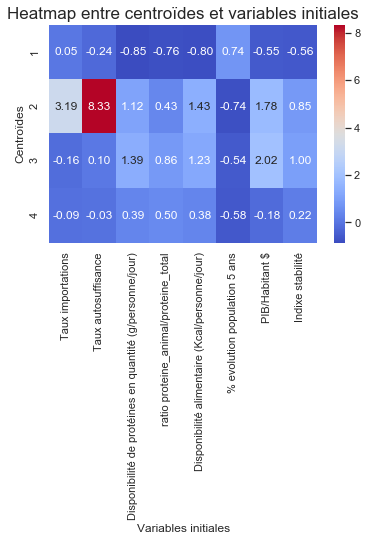

In [101]:
df_centroids = pd.DataFrame(centroids_cah, 
                              columns = df.columns, 
                              index=["1", "2", "3", "4"])


# Création heatmap entre centroïdes et variables initiales
plt.figure(figsize=(6, 4))

sns.heatmap(df_centroids, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Heatmap entre centroïdes et variables initiales", fontsize=17)
plt.xlabel("Variables initiales", fontsize=12)
plt.ylabel("Centroïdes", fontsize=12)
plt.show()

In [102]:
df_centroids

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
1,0.050571,-0.236953,-0.846608,-0.755591,-0.801048,0.739251,-0.547983,-0.561217
2,3.193937,8.328722,1.122490,0.425371,1.432931,-0.741021,1.784816,0.851926
3,-0.157868,0.101581,1.387739,0.859574,1.232795,-0.542034,2.015666,1.003056
4,-0.092511,-0.026439,0.386054,0.495259,0.382699,-0.580507,-0.175631,0.223407


###  Cluster 1
- Taux importations, Taux autosuffisance ,Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, PIB par habitant et indixe stabilité faible.
- évolution population élevée.

### Cluster 2
- Taux importation,Taux autosuffisance ,Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, PIB par habitant et indixe stabilité élevès.
- évolution population faible.
- Ce cluster a seulement deux individus. Ils presentent les même caractéristiques. Leurs données sont trop proches. On peut les éliminer de l'analyse
 

### Cluster 3
- Taux autosuffisance et évolution population faible.
- Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, PIB par habitant et indixe stabilité élevées.
- Taux importations moyen.

### Cluster 4
- Taux importations, Taux autosuffisance ,évolution population et  PIB par habitant faible.
- Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, et indixe stabilité élevées.
 
 
On peut choisir le **cluster 3** ,car il contient:
Pays fort PIB(pays riches), taux d'autosuffisance faible en volaille( production en volaille pas suffissance),stabilité politique fort(pays stables),ratio animal/proteine élevée( consommation de produit d'origine animal).





In [103]:
display(cah_gr_3)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité,cluster
Zone,,,,,,,,,
Allemagne,0.120596,0.502354,1.181920,0.674606,1.538821,-0.758445,1.696244,0.756476,3
Australie,-0.880204,-0.209000,1.380353,1.928309,0.988629,0.038513,2.384921,1.104589,3
Autriche,0.443065,0.670653,1.385389,0.773360,1.833566,-0.506934,1.845162,1.273031,3
Canada,-0.639204,-0.044091,1.043923,0.777122,1.392540,-0.288755,1.720794,1.329179,3
Danemark,0.784677,1.479086,1.627639,0.691536,1.154560,-0.746324,2.409607,1.070901,3
Espagne,-0.618146,0.015047,1.328982,1.319798,0.907847,-1.206924,0.806866,0.408362,3
Finlande,-0.602830,-0.055961,1.871903,0.363297,1.054128,-0.803899,1.790288,1.306720,3
France,-0.225057,0.390012,1.585333,0.762074,1.532271,-0.769051,1.468923,0.408362,3
Irlande,0.735754,1.255040,1.269552,0.539173,1.877232,-0.596326,3.089821,1.216884,3


In [104]:
cah_gr_3.shape

(24, 9)

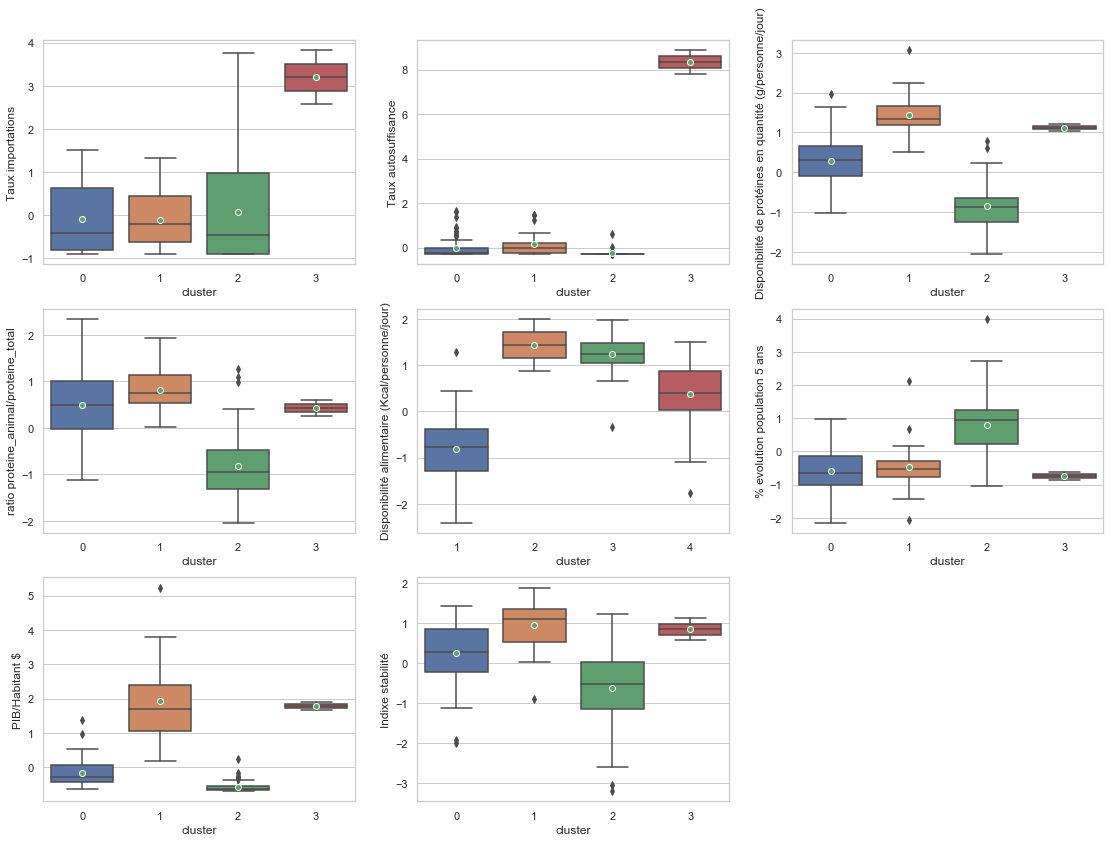

In [105]:
# Création de boxplot avec kmeans
plt.figure(figsize=(19, 14))

sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df_k_means, x="cluster", y="Taux importations",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(332)
sns.boxplot(data=df_k_means, x="cluster", y="Taux autosuffisance",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(333)
sns.boxplot(data=df_k_means, x="cluster", y="Disponibilité de protéines en quantité (g/personne/jour)",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(334)
sns.boxplot(data=df_k_means, x="cluster", y="ratio proteine_animal/proteine_total",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(335)
sns.boxplot(data=df_cah, x="cluster", y="Disponibilité alimentaire (Kcal/personne/jour)",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(336)
sns.boxplot(data=df_k_means, x="cluster", y="% evolution population 5 ans",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(337)
sns.boxplot(data=df_k_means, x="cluster", y="PIB/Habitant $",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})

plt.subplot(338)
sns.boxplot(data=df_k_means, x="cluster", y="Indixe stabilité",showmeans=True,
            meanprops={"marker": "o","markeredgecolor": "white","markeredgecolor": "w"})



Cluster 0
- Taux importations, Taux autosuffisance ,Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, PIB par habitant et indixe stabilité faible.
- évolution population élevée.

Cluster 1
-  Taux autosuffisance et évolution population faible.
- Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, PIB par habitant et indixe stabilité élevées.
- Taux importations moyen.

Cluster 2
- Taux importation,Taux autosuffisance ,Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, PIB par habitant et indixe stabilité élevès.
- évolution population faible.
 
Cluster 3
- Taux importations, Taux autosuffisance ,évolution population et  PIB par habitant faible.
- Disponibilité de protéine, ration protéine animal/protéine totale ,Disponibilité alimentaire, et indixe stabilité élevées.

On peut choisir le cluster 1 ,car il contient:
Pays fort PIB(pays riches), taux d'autosuffisance faible en volaille( production en volaille pas suffissance),stabilité politique fort(pays stables),ratio animal/proteine élevée( consommation de produit animal).

In [137]:
display(kmeans_gr_1)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité,cluster
Zone,,,,,,,,,
Allemagne,0.120596,0.502354,1.181920,0.674606,1.538821,-0.758445,1.696244,0.756476,1
Australie,-0.880204,-0.209000,1.380353,1.928309,0.988629,0.038513,2.384921,1.104589,1
Autriche,0.443065,0.670653,1.385389,0.773360,1.833566,-0.506934,1.845162,1.273031,1
Canada,-0.639204,-0.044091,1.043923,0.777122,1.392540,-0.288755,1.720794,1.329179,1
Danemark,0.784677,1.479086,1.627639,0.691536,1.154560,-0.746324,2.409607,1.070901,1
Espagne,-0.618146,0.015047,1.328982,1.319798,0.907847,-1.206924,0.806866,0.408362,1
Finlande,-0.602830,-0.055961,1.871903,0.363297,1.054128,-0.803899,1.790288,1.306720,1
France,-0.225057,0.390012,1.585333,0.762074,1.532271,-0.769051,1.468923,0.408362,1
Irlande,0.735754,1.255040,1.269552,0.539173,1.877232,-0.596326,3.089821,1.216884,1


In [107]:
kmeans_gr_0.shape

(71, 9)

## 6.1  Analyse des individus du cluster 3

In [108]:
cah_gr_3.head()

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité,cluster
Zone,,,,,,,,,
Allemagne,0.120596,0.502354,1.181920,0.674606,1.538821,-0.758445,1.696244,0.756476,3
Australie,-0.880204,-0.209000,1.380353,1.928309,0.988629,0.038513,2.384921,1.104589,3
Autriche,0.443065,0.670653,1.385389,0.773360,1.833566,-0.506934,1.845162,1.273031,3
Canada,-0.639204,-0.044091,1.043923,0.777122,1.392540,-0.288755,1.720794,1.329179,3
Danemark,0.784677,1.479086,1.627639,0.691536,1.154560,-0.746324,2.409607,1.070901,3


In [138]:
# on récupére les valeurs des variables non centré réduite
pays_cah_gr_3 = cah_gr_3.index
df_cah_3 = df.loc[df.index.isin(pays_cah_gr_3)]
display(df_cah_3)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
Zone,,,,,,,,
Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59
Australie,1.37,3.59,108.01,46.66,3307.0,7.34,57430.803787,0.90
Autriche,63.58,45.09,108.11,34.38,3694.0,3.74,47429.535836,1.05
Canada,12.70,11.37,101.33,34.42,3492.0,5.18,45125.109795,1.10
Danemark,79.64,83.23,112.92,33.51,3383.0,2.16,57888.203512,0.87
Espagne,13.69,14.16,106.99,40.19,3270.0,-0.88,28190.806662,0.28
Finlande,14.41,10.81,117.77,30.02,3337.0,1.78,46412.760006,1.08
France,32.17,31.85,112.08,34.26,3556.0,2.01,40458.149875,0.28
Irlande,77.34,72.66,105.81,31.89,3714.0,3.15,70491.993301,1.00


In [139]:
df_cah_3.shape

(24, 8)

# 6.  ACP(Analyse composante principale)

In [113]:
# Eboulis des valeurs propres
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [114]:
# la variance captée par chaque nouvelle composante.
pca.explained_variance_ratio_

array([0.45532684, 0.16747689, 0.11788326, 0.09701931])

La 1ère composante capte 45% de la variance de nos données initiales, la 2ème 17% , la 3éme 12% et la 4éme 10%

In [115]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([45.53, 16.75, 11.79,  9.7 ])

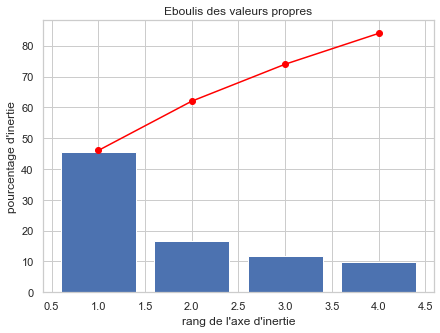

In [116]:
# somme cumulées des variance
scree_cum = scree.cumsum().round()
n_components = 4
C_list = range(1, n_components+1)
list(C_list)

#graphique
figure1 = plt.figure(figsize=(7,5))
plt.bar(C_list, scree)
plt.plot(C_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

In [117]:
scree

array([45.53, 16.75, 11.79,  9.7 ])

In [118]:
scree_cum

array([46., 62., 74., 84.])

 Les 2 premières dimensions captent donc 46+17 = 63% de l'information. L'information peut passer de 46+17+12 = 75% avec la 3 ème dimension. 

In [119]:
features = df.columns
pcs= pca.components_

pcs= pd.DataFrame(pcs)
pcs



,0,1,2,3,4,5,6,7
0,0.059306,0.221303,0.452681,0.367709,0.435017,-0.336276,0.405636,0.374853
1,0.781600,0.453403,-0.224486,-0.000627,-0.222490,0.159569,0.040652,0.237731
2,-0.071360,0.598523,0.222836,-0.489890,0.341860,0.117760,0.038602,-0.463469
3,0.062534,-0.325163,0.167343,-0.108035,0.118779,0.760058,0.501213,0.087585


In [120]:
pcs.columns = features
pcs.index = [f"F{i}" for i in C_list]
pcs.round(2)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
F1,0.06,0.22,0.45,0.37,0.44,-0.34,0.41,0.37
F2,0.78,0.45,-0.22,-0.00,-0.22,0.16,0.04,0.24
F3,-0.07,0.60,0.22,-0.49,0.34,0.12,0.04,-0.46
F4,0.06,-0.33,0.17,-0.11,0.12,0.76,0.50,0.09


In [121]:
pcs.T

,F1,F2,F3,F4
Taux importations,0.059306,0.781600,-0.071360,0.062534
Taux autosuffisance,0.221303,0.453403,0.598523,-0.325163
Disponibilité de protéines en quantité (g/personne/jour),0.452681,-0.224486,0.222836,0.167343
ratio proteine_animal/proteine_total,0.367709,-0.000627,-0.489890,-0.108035
Disponibilité alimentaire (Kcal/personne/jour),0.435017,-0.222490,0.341860,0.118779
% evolution population 5 ans,-0.336276,0.159569,0.117760,0.760058
PIB/Habitant $,0.405636,0.040652,0.038602,0.501213
Indixe stabilité,0.374853,0.237731,-0.463469,0.087585


In [122]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
   

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 8))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  
    
    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    
plt.savefig('cercle.png')

<Figure size 432x288 with 0 Axes>

In [123]:
x_y = (0,1)


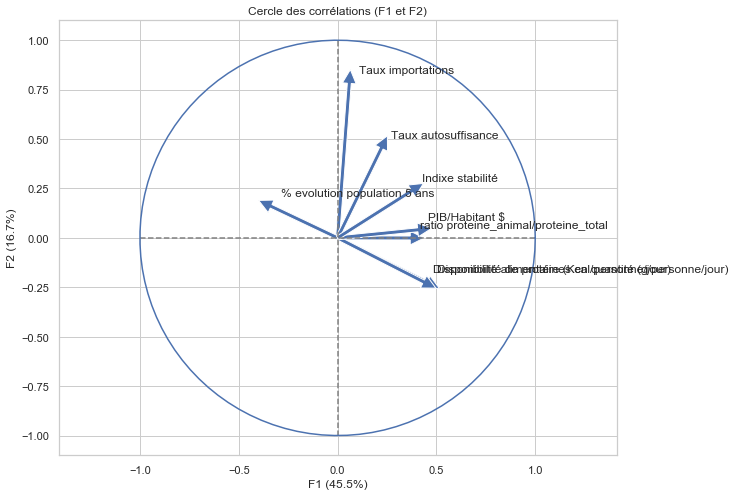

In [124]:
correlation_graph(pca, x_y, features)

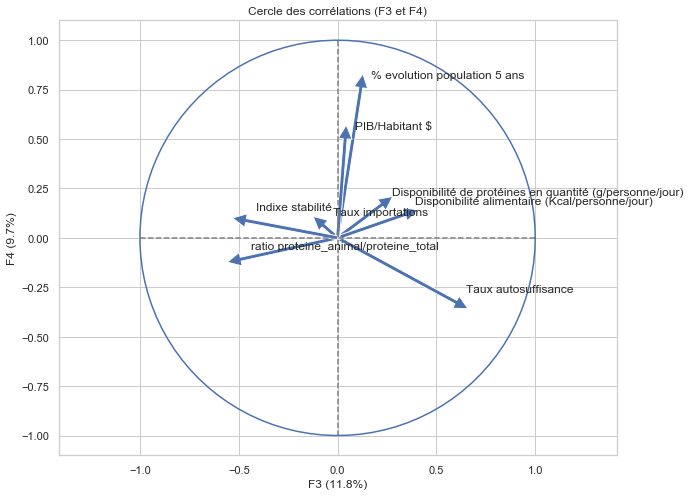

In [125]:
x_y = (2,3)
correlation_graph(pca, x_y, features)

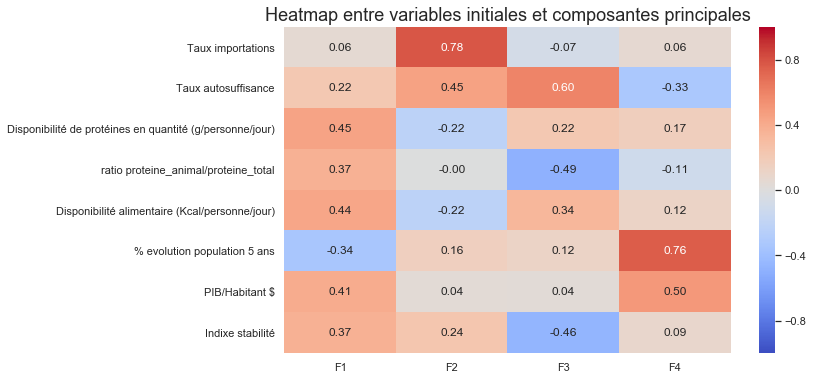

In [126]:
# On peut aussi visualiser les liens entre les variables initiales et F1 et F2 grâce à une heatmap

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Heatmap entre variables initiales et composantes principales", fontsize= 18)
plt.show()

- Les variables Disponibilité proteine,ratio proteine_animal/proteine_total, PIB/habitant, Ratio_prot_alim, indexe stabilité sont corrélées positivement à la prmiére dimension(F1).
-  Les variables Taux importations et Taux autosuffisance sont fortement corrélées positivement à la dexiéme dimension(F2).

In [127]:
X_projected = pca.transform(X_scaled)

In [128]:
# projection du nuage des individus sur le plan F1-F2
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)
    
        

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



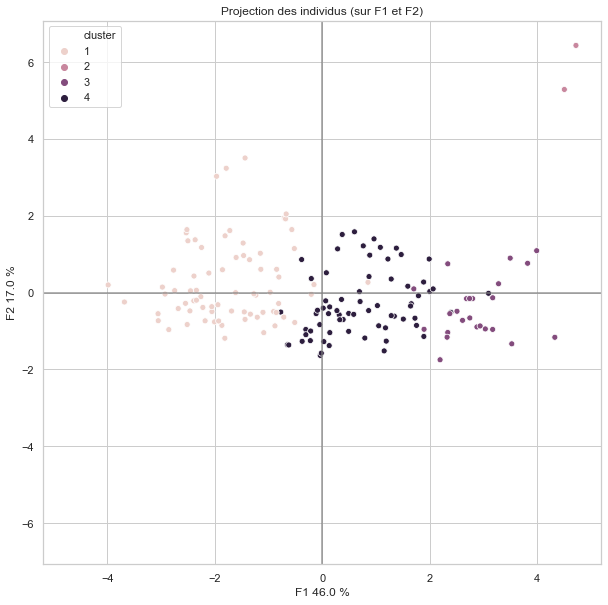

In [129]:
x_y = [0,1]
#names= df.index

display_factorial_planes(X_projected, x_y, pca, clusters=df_cah.cluster,figsize=(10,10), marker="o")



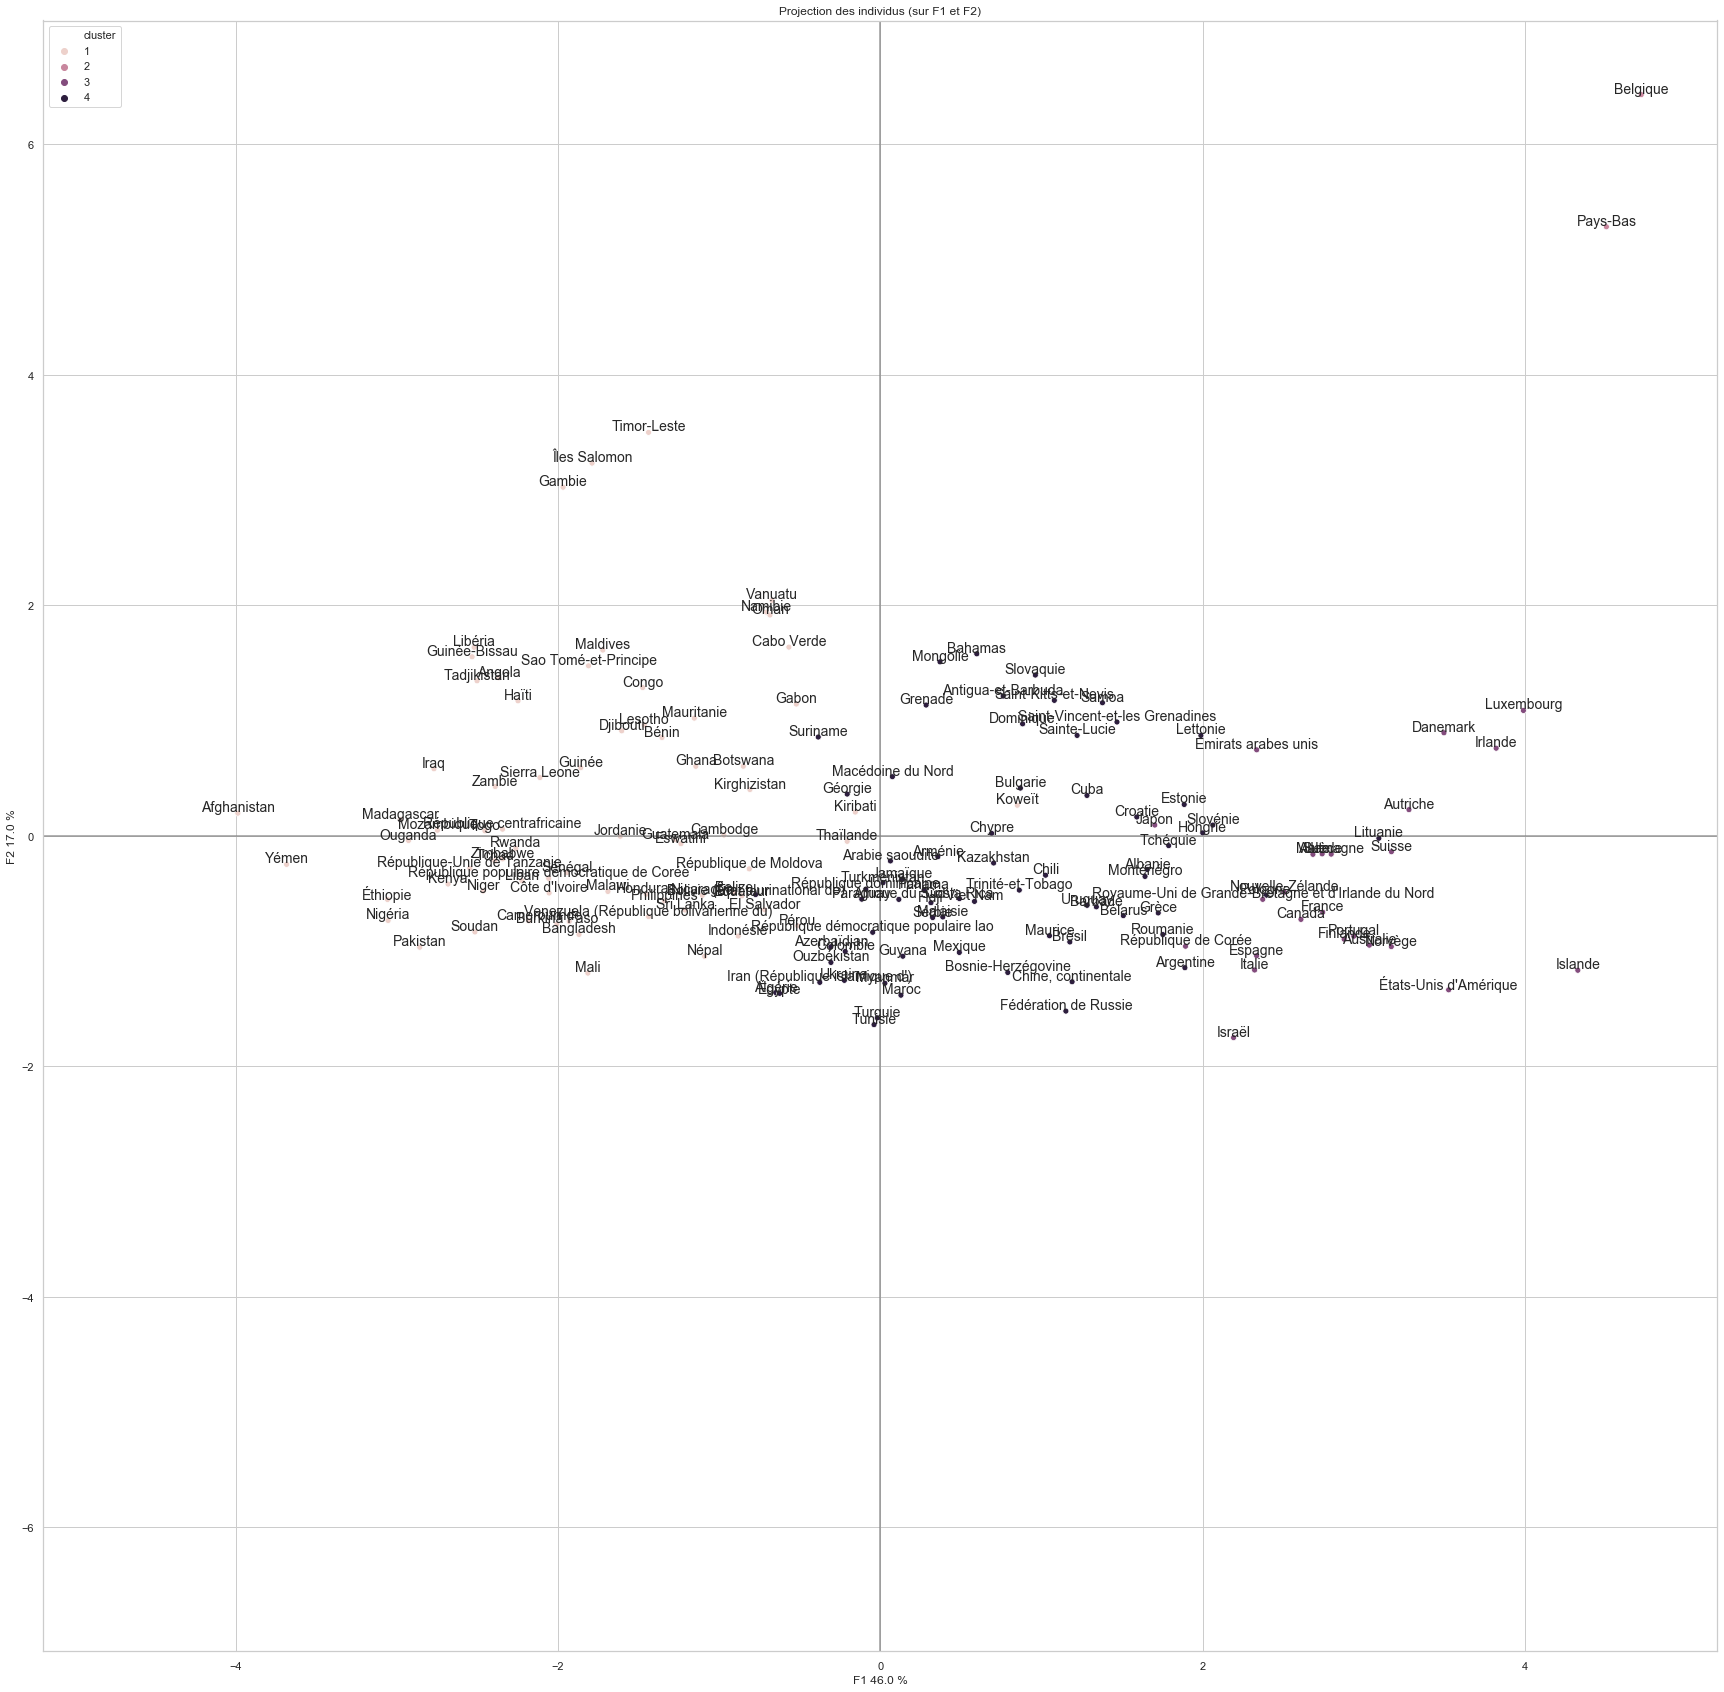

In [130]:
x_y = [0,1]
names= df.index

display_factorial_planes(X_projected, x_y, pca,labels= names, clusters=df_cah.cluster,figsize=(30,30), marker="o")


On voit bien que les individus(pays) qui sont situés sur la droite du graphique  sont les pays avec PIB, stabilité politique et ratio proteine_animal/proteine_total fort et sur le haut du graphique les pays importateur de volaille fort.



#### Cela confirme la classification (CAH) avec :
- les pays fort en PIB , en disponibilité alimentaire en protéines /kcal et stable politiquement situés sur la droite du graphe.
- les pays faible en PIB , en disponibilité alimentaire en protéines /kcal et pas stable politiquement situés sur la gauche du graphe.

## cluster selectionner

In [131]:
display(df_cah_3)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
Zone,,,,,,,,
Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59
Australie,1.37,3.59,108.01,46.66,3307.0,7.34,57430.803787,0.90
Autriche,63.58,45.09,108.11,34.38,3694.0,3.74,47429.535836,1.05
Canada,12.70,11.37,101.33,34.42,3492.0,5.18,45125.109795,1.10
Danemark,79.64,83.23,112.92,33.51,3383.0,2.16,57888.203512,0.87
Espagne,13.69,14.16,106.99,40.19,3270.0,-0.88,28190.806662,0.28
Finlande,14.41,10.81,117.77,30.02,3337.0,1.78,46412.760006,1.08
France,32.17,31.85,112.08,34.26,3556.0,2.01,40458.149875,0.28
Irlande,77.34,72.66,105.81,31.89,3714.0,3.15,70491.993301,1.00


In [132]:
df_cah_3.sort_values(by="Taux importations", ascending= False)

,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
Zone,,,,,,,,
Émirats arabes unis,105.10,22.82,107.26,26.42,3370.0,3.78,42522.377622,0.62
Luxembourg,100.00,9.09,105.79,38.17,3334.0,11.50,110203.008202,1.33
Danemark,79.64,83.23,112.92,33.51,3383.0,2.16,57888.203512,0.87
Irlande,77.34,72.66,105.81,31.89,3714.0,3.15,70491.993301,1.00
Malte,64.29,0.00,116.32,34.16,3460.0,3.82,28122.287168,1.25
Autriche,63.58,45.09,108.11,34.38,3694.0,3.74,47429.535836,1.05
Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59
Suède,44.92,12.30,107.03,34.73,3214.0,3.79,53788.877502,0.98
Japon,44.27,0.41,86.52,35.18,2699.0,-0.72,38928.952602,1.11


Une grande part des pays de ce groupe étant Européens, Il est certainement pertinent de les privilégier 


In [133]:
df_cah_3.reset_index(inplace=True)
df_cah_3.head()

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
0,Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59
1,Australie,1.37,3.59,108.01,46.66,3307.0,7.34,57430.803787,0.90
2,Autriche,63.58,45.09,108.11,34.38,3694.0,3.74,47429.535836,1.05
3,Canada,12.70,11.37,101.33,34.42,3492.0,5.18,45125.109795,1.10
4,Danemark,79.64,83.23,112.92,33.51,3383.0,2.16,57888.203512,0.87


In [134]:
df_cah_3['Zone'].unique()

array(['Allemagne', 'Australie', 'Autriche', 'Canada', 'Danemark',
       'Espagne', 'Finlande', 'France', 'Irlande', 'Islande', 'Israël',
       'Italie', 'Japon', 'Luxembourg', 'Malte', 'Norvège',
       'Nouvelle-Zélande', 'Portugal',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République de Corée', 'Suisse', 'Suède', 'Émirats arabes unis',
       "États-Unis d'Amérique"], dtype=object)

In [135]:
liste_eu = ['Allemagne','Autriche', 'Danemark',
       'Espagne', 'Finlande', 'France', 'Irlande', 'Islande',
       'Italie',  'Luxembourg', 'Malte', 'Norvège', 'Portugal',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
        'Suisse', 'Suède']

df_cah_3_eu = df_cah_3.loc[df_cah_3["Zone"].isin(liste_eu)]
display(df_cah_3_eu)


,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
0,Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59
2,Autriche,63.58,45.09,108.11,34.38,3694.0,3.74,47429.535836,1.05
4,Danemark,79.64,83.23,112.92,33.51,3383.0,2.16,57888.203512,0.87
5,Espagne,13.69,14.16,106.99,40.19,3270.0,-0.88,28190.806662,0.28
6,Finlande,14.41,10.81,117.77,30.02,3337.0,1.78,46412.760006,1.08
7,France,32.17,31.85,112.08,34.26,3556.0,2.01,40458.149875,0.28
8,Irlande,77.34,72.66,105.81,31.89,3714.0,3.15,70491.993301,1.00
9,Islande,20.00,0.00,141.34,31.52,3629.0,2.68,71961.532046,1.35
11,Italie,8.27,15.60,106.69,33.15,3522.0,1.33,32694.406219,0.31
13,Luxembourg,100.00,9.09,105.79,38.17,3334.0,11.50,110203.008202,1.33


In [136]:
df_cah_3_eu.sort_values(by="Taux importations", ascending= False)

,Zone,Taux importations,Taux autosuffisance,Disponibilité de protéines en quantité (g/personne/jour),ratio proteine_animal/proteine_total,Disponibilité alimentaire (Kcal/personne/jour),% evolution population 5 ans,PIB/Habitant $,Indixe stabilité
13,Luxembourg,100.00,9.09,105.79,38.17,3334.0,11.50,110203.008202,1.33
4,Danemark,79.64,83.23,112.92,33.51,3383.0,2.16,57888.203512,0.87
8,Irlande,77.34,72.66,105.81,31.89,3714.0,3.15,70491.993301,1.00
14,Malte,64.29,0.00,116.32,34.16,3460.0,3.82,28122.287168,1.25
2,Autriche,63.58,45.09,108.11,34.38,3694.0,3.74,47429.535836,1.05
0,Allemagne,48.42,37.15,104.07,33.33,3559.0,2.08,44670.222288,0.59
21,Suède,44.92,12.30,107.03,34.73,3214.0,3.79,53788.877502,0.98
20,Suisse,38.35,3.01,95.46,31.32,3414.0,5.59,83353.597572,1.26
18,Royaume-Uni de Grande-Bretagne et d'Irlande du...,34.87,16.07,103.87,35.09,3428.0,3.41,40617.679075,0.39
7,France,32.17,31.85,112.08,34.26,3556.0,2.01,40458.149875,0.28
